In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


ImportError: DLL load failed while importing _c_internal_utils: The specified module could not be found.

In [ ]:
table = pd.read_csv("WineDataset.csv")
table.describe()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [ ]:

# Разделение данных на признаки и целевую переменную
X = table.drop('Wine', axis=1)
y = table['Wine']

In [ ]:
# Перемешивание и разделение данных (80% на обучение, 20% на тестирование)
np.random.seed(42)
train_data = table.sample(frac=0.8, random_state=42).reset_index(drop=True)
test_data = table.drop(train_data.index).reset_index(drop=True)



In [ ]:
# Рассчитываем среднее и стандартное отклонение для обучающего набора
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
train_means = train_data[numerical_columns].mean()
train_stds = train_data[numerical_columns].std()


In [ ]:
def standardize_column(column, mean, std):
    return (column - mean) / std


# Применяем нормализацию к обучающему набору
for column in numerical_columns:
    train_data[column] = standardize_column(train_data[column], train_means[column], train_stds[column])

# Применяем нормализацию к тестовому набору с использованием параметров обучающего набора
for column in numerical_columns:
    test_data[column] = standardize_column(test_data[column], train_means[column], train_stds[column])



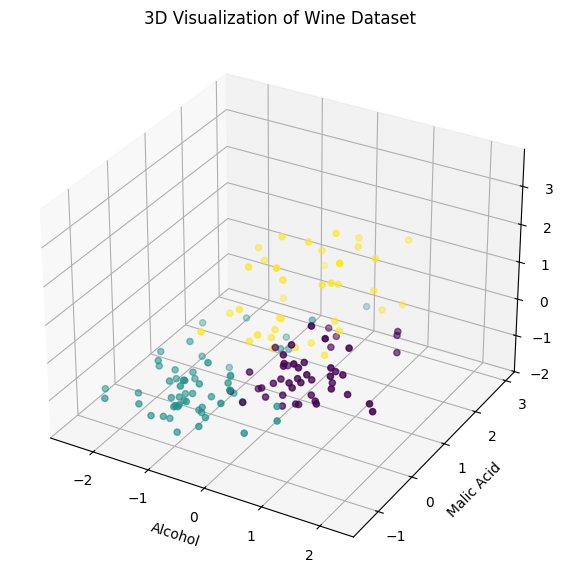

In [ ]:
# 3D визуализация признаков
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_data['Alcohol'], train_data['Malic Acid'], train_data['Color intensity'], c=train_data['Wine'], cmap='viridis')
ax.set_xlabel('Alcohol')
ax.set_ylabel('Malic Acid')
ax.set_zlabel('Color intensity')
plt.title('3D Visualization of Wine Dataset')
plt.show()

In [ ]:
# Реализация метода k-ближайших соседей
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def predict(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        y_pred.append(most_common)
    return np.array(y_pred)

In [ ]:
# Модель 1: случайный отбор признаков
features_model_1 = np.random.choice(numerical_columns, size=3, replace=False)  # Случайно выбираем 3 признака
X_train_1 = train_data[features_model_1].values
X_test_1 = test_data[features_model_1].values

# Модель 2: фиксированный набор признаков
features_model_2 = ['Alcohol', 'Malic Acid', 'Color intensity']  # Выбираем заранее фиксированные признаки
X_train_2 = train_data[features_model_2].values
X_test_2 = test_data[features_model_2].values

In [ ]:
# Оценка моделей при различных значениях k
k_values = [3, 5, 10]
results = {}

for k in k_values:
    # Модель 1
    y_pred_1 = predict(X_train_1, y.values[train_data.index], X_test_1, k)
    cm_1 = confusion_matrix(y.values[test_data.index], y_pred_1)
    report_1 = classification_report(y.values[test_data.index], y_pred_1)
    
    # Модель 2
    y_pred_2 = predict(X_train_2, y.values[train_data.index], X_test_2, k)
    cm_2 = confusion_matrix(y.values[test_data.index], y_pred_2)
    report_2 = classification_report(y.values[test_data.index], y_pred_2)
    
    results[k] = {
        'Model 1': (cm_1, report_1),
        'Model 2': (cm_2, report_2)
    }
    
    # 3D-визуализация предсказанных классов для модели 2
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    # Отображение обучающих данных
    ax.scatter(X_train_2[:, 0], X_train_2[:, 1], X_train_2[:, 2], c=y.values[train_data.index], cmap='viridis', marker='o', label="Train Data")
    # Отображение предсказаний для тестовых данных
    ax.scatter(X_test_2[:, 0], X_test_2[:, 1], X_test_2[:, 2], c=y_pred_2, cmap='cool', marker='^', label="Test Predictions")
    
    ax.set_xlabel('Alcohol')
    ax.set_ylabel('Malic Acid')
    ax.set_zlabel('Color intensity')
    plt.title(f'3D Visualization of Wine Dataset - Test Predictions (k={k})')
    plt.legend()
    plt.show()

# Вывод результатов
for k, result in results.items():
    print(f"Results for k={k}")
    print("Model 1 Confusion Matrix:")
    print(result['Model 1'][0])
    print("Model 1 Classification Report:")
    print(result['Model 1'][1])
    
    print("Model 2 Confusion Matrix:")
    print(result['Model 2'][0])
    print("Model 2 Classification Report:")
    print(result['Model 2'][1])

c:\Users\kadil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kadil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kadil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [ ]:
# Вывод результатов
for k, (cm_1, report_1) in results.items():
    print(f"Results for k={k}")
    print("Model 1 Confusion Matrix:")
    print(cm_1)
    print("Model 1 Classification Report:")
    print(report_1)
    
    print("Model 2 Confusion Matrix:")
    print(results[k]['Model 2'][0])
    print("Model 2 Classification Report:")
    print(results[k]['Model 2'][1])

Results for k=3
Model 1 Confusion Matrix:
Model 1
Model 1 Classification Report:
Model 2
Model 2 Confusion Matrix:
[[23 12  1]
 [ 0  0  0]
 [ 0  0  0]]
Model 2 Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.64      0.78        36
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.64        36
   macro avg       0.33      0.21      0.26        36
weighted avg       1.00      0.64      0.78        36

Results for k=5
Model 1 Confusion Matrix:
Model 1
Model 1 Classification Report:
Model 2
Model 2 Confusion Matrix:
[[23 13]
 [ 0  0]]
Model 2 Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.64      0.78        36
           2       0.00      0.00      0.00         0

    accuracy                           0.64        36
   macro avg       0.50      0.32      0.39        36